![](mad.png)

# Trabajo Final de Python - Big Data B 

### Integrantes:
- Giménez, Carlos
- Lara, Mariana
- Paredes, Ericson
- Ramírez, Silvia
### Profesora:
- Luz Frías Díaz
### Asignatura:
- Digital transformation
### Dataset:
- Airbnb Madrid contenida y actualizada en: http://insideairbnb.com/get-the-data.html. 

> Los anfitriones en España llevan abriendo las puertas de sus hogares a los viajeros desde el 2009. En este estudio, se incluyen  datos  relevantes sobre la comunidad con información actualizada hasta Septiembre de 2019.

## Importando las librerias

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import datetime
import requests
import folium
import json 
import warnings
warnings.filterwarnings('ignore')

Por favor tener en cuenta que una sección de este proyecto incluye la utilidad **Wordcloud**, por lo que hay que ejecutar en el terminal alguna de las siguientes líneas:

```
 conda install -c conda-forge wordcloud
 conda install -c conda-forge/label/gcc7 wordcloud
 conda install -c conda-forge/label/cf201901 wordcloud
```

## Leyendo el Dataset

Para el desarrollo de este trabajo, se va a utilizar archivos **.csv** que contienen información sobre los *Airbnb* de la comunidad de Madrid.

- **madrid:** Summary information and metrics for listings in Madrid (good for visualisations).


### Archivos *.csv*

In [36]:
madrid = pd.read_csv('aribnb19.csv')

#listing19.head
#neigh.head
madrid.head()

id                                               name  host_id  \
0   6369  Rooftop terrace room with ensuite bathroom, Airc.    13660   
1  21853                               Bright and airy room    83531   
2  24805                             Gran Via Studio Madrid   101471   
3  24836                     Select the Madrid more "cool".   101653   
4  26825                 Single Room whith private Bathroom   114340   

  host_name neighbourhood_group   neighbourhood  latitude  longitude  \
0     Simon           Chamartín  Hispanoamérica  40.45628   -3.67763   
1     Abdel              Latina        Cármenes  40.40341   -3.74084   
2    Iraido              Centro     Universidad  40.42202   -3.70395   
3     Tenty              Centro        Justicia  40.41995   -3.69764   
4  Agustina          Arganzuela         Legazpi  40.38985   -3.69011   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     70               1                 65  2019-09-04   
1     Private room     17               4                 33  2018-07-15   
2  Entire home/apt     80               5                  2  2017-07-03   
3  Entire home/apt    115               3                 64  2019-07-07   
4     Private room     25               2                136  2019-07-10   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.56                               1                53  
1               0.55                               2                48  
2               0.03                               1               354  
3               0.63                               1               301  
4               1.19                               1               337

In [37]:
madrid.describe()

id       host_id      latitude     longitude         price  \
count  2.083700e+04  2.083700e+04  20837.000000  20837.000000  20837.000000   
mean   2.356026e+07  1.014144e+08     40.420548     -3.694500    134.065364   
std    1.083667e+07  8.956078e+07      0.021881      0.027793    381.207575   
min    6.369000e+03  5.154000e+03     40.319480     -3.890940      8.000000   
25%    1.608985e+07  2.232182e+07     40.409550     -3.707490     40.000000   
50%    2.459474e+07  7.574288e+07     40.418900     -3.701180     65.000000   
75%    3.401318e+07  1.719263e+08     40.429020     -3.689110    100.000000   
max    3.873002e+07  2.960847e+08     40.573990     -3.527660   9999.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    20837.000000       20837.000000       16183.000000   
mean         4.373614          35.163891           1.958974   
std         20.428777          61.863053           1.967925   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.430000   
50%          2.000000           8.000000           1.280000   
75%          3.000000          42.000000           2.940000   
max       1125.000000         594.000000          34.230000   

       calculated_host_listings_count  availability_365  
count                    20837.000000      20837.000000  
mean                        12.188559        155.097567  
std                         32.156130        133.746263  
min                          1.000000          0.000000  
25%                          1.000000         17.000000  
50%                          2.000000        123.000000  
75%                          7.000000        300.000000  
max                        231.000000        365.000000

## Llamado a las APIs.

Para este trabajo, se han utilizado dos APIs con información del [Ayuntamiento de Madrid](https://datos.madrid.es/portal/site/egob/menuitem.214413fe61bdd68a53318ba0a8a409a0/?vgnextoid=b07e0f7c5ff9e510VgnVCM1000008a4a900aRCRD&dsName=Museos32de32la32ciudad32de32Madrid):
- Mercadillos
- Museos 

### API 1:  Mercadillos del ayuntamiento de Madrid

In [38]:
response = requests.get('https://datos.madrid.es/egob/catalogo/202105-0-mercadillos.json')
#Accept: application/json
response.status_code
url = 'https://datos.madrid.es/egob/catalogo/202105-0-mercadillos.json'
r = requests.get(url, headers={"User-Agent": "curl/7.61.0"})
r_json = r.json()
#respuesta en formato json
r_json

{'@context': {'c': 'http://www.w3.org/2002/12/cal#',
  'dcterms': 'http://purl.org/dc/terms/',
  'geo': 'http://www.w3.org/2003/01/geo/wgs84_pos#',
  'loc': 'http://purl.org/ctic/infraestructuras/localizacion#',
  'org': 'http://purl.org/ctic/infraestructuras/organizacion#',
  'vcard': 'http://www.w3.org/2006/vcard/ns#',
  'title': 'vcard:fn',
  'id': 'dcterms:identifier',
  'relation': 'dcterms:relation',
  'references': 'dcterms:references',
  'address': 'vcard:adr',
  'area': 'loc:barrio',
  'district': 'loc:distrito',
  'locality': 'vcard:locality',
  'postal-code': 'vcard:postal-code',
  'street': 'vcard:street-address',
  'location': 'vcard:geo',
  'latitude': 'geo:lat',
  'longitude': 'geo:long',
  'organization': 'vcard:org',
  'organization-desc': 'dcterms:description',
  'accesibility': 'org:accesibilidad',
  'services': 'org:servicios',
  'schedule': 'org:horario',
  'organization-name': 'vcard:organization-name',
  'description': 'c:summary',
  'link': 'c:url',
  'uid': 'c:

In [39]:
import pandas as pd
mercadillo1 = r_json['@graph'][0]['title']
#mercadillo2 = r_json['@graph'][1]['title']
mercadillo1
#mercadillo2

'Mercadillo en la vía pública UVA Hortaleza (Distrito Hortaleza)'

In [40]:
def get_networks():
    url = 'https://datos.madrid.es/egob/catalogo/202105-0-mercadillos.json'
    req = requests.get(url, headers={"User-Agent": "curl/7.61.0"})
    req
    res=req.json()
    return res['@graph']
get_networks()

[{'@id': 'https://datos.madrid.es/egob/catalogo/tipo/entidadesyorganismos/19487-mercadillo-via-publica-uva-hortaleza-distrito-hortaleza-.json',
  '@type': 'https://datos.madrid.es/egob/kos/entidadesYorganismos/Comercios/MercadillosViaPublica',
  'id': '19487',
  'title': 'Mercadillo en la vía pública UVA Hortaleza (Distrito Hortaleza)',
  'relation': 'http://www.madrid.es/sites/v/index.jsp?vgnextchannel=bfa48ab43d6bb410VgnVCM100000171f5a0aRCRD&vgnextoid=f75f92355c51c010VgnVCM2000000c205a0aRCRD',
  'address': {'district': {'@id': 'https://datos.madrid.es/egob/kos/Provincia/Madrid/Municipio/Madrid/Distrito/Hortaleza'},
   'area': {'@id': 'https://datos.madrid.es/egob/kos/Provincia/Madrid/Municipio/Madrid/Distrito/Hortaleza/Barrio/PinarRey'},
   'locality': 'MADRID',
   'postal-code': '28033',
   'street-address': 'CARRETERA ESTACION DE HORTALEZA 16'},
  'location': {'latitude': 40.479473210968706,
   'longitude': -3.6515575746954614},
  'organization': {'organization-desc': 'Metro: Horta

In [41]:
data=get_networks()
data
#DataFrame de Mercadillos
mercadillos = pd.DataFrame(data)
mercadillos.head()

@id  \
0  https://datos.madrid.es/egob/catalogo/tipo/ent...   
1  https://datos.madrid.es/egob/catalogo/tipo/ent...   
2  https://datos.madrid.es/egob/catalogo/tipo/ent...   
3  https://datos.madrid.es/egob/catalogo/tipo/ent...   
4  https://datos.madrid.es/egob/catalogo/tipo/ent...   

                                               @type     id  \
0  https://datos.madrid.es/egob/kos/entidadesYorg...  19487   
1  https://datos.madrid.es/egob/kos/entidadesYorg...  19633   
2  https://datos.madrid.es/egob/kos/entidadesYorg...  19542   
3  https://datos.madrid.es/egob/kos/entidadesYorg...  19629   
4  https://datos.madrid.es/egob/kos/entidadesYorg...  63209   

                                               title  \
0  Mercadillo en la vía pública UVA Hortaleza (Di...   
1  Mercadillo en la vía pública de Camino de las ...   
2  Mercadillo en la vía pública de El Pardo (Dist...   
3  Mercadillo en la vía pública de Orcasur (Distr...   
4  Mercadillo en la vía pública de Parque de la C...   

                                            relation  \
0  http://www.madrid.es/sites/v/index.jsp?vgnextc...   
1  http://www.madrid.es/sites/v/index.jsp?vgnextc...   
2  http://www.madrid.es/sites/v/index.jsp?vgnextc...   
3  http://www.madrid.es/sites/v/index.jsp?vgnextc...   
4  http://www.madrid.es/sites/v/index.jsp?vgnextc...   

                                             address  \
0  {'district': {'@id': 'https://datos.madrid.es/...   
1  {'district': {'@id': 'https://datos.madrid.es/...   
2  {'district': {'@id': 'https://datos.madrid.es/...   
3  {'district': {'@id': 'https://datos.madrid.es/...   
4  {'district': {'@id': 'https://datos.madrid.es/...   

                                            location  \
0  {'latitude': 40.479473210968706, 'longitude': ...   
1  {'latitude': 40.37467890972045, 'longitude': -...   
2  {'latitude': 40.51788643866983, 'longitude': -...   
3  {'latitude': 40.36806275578338, 'longitude': -...   
4  {'latitude': 40.40644768286364, 'longitude': -...   

                                        organization  
0  {'organization-desc': 'Metro: Hortaleza (línea...  
1  {'organization-desc': 'Metro: Carabanchel Alto...  
2  {'organization-desc': '', 'accesibility': '0',...  
3  {'organization-desc': 'Bus: 78, 116.Metro: San...  
4  {'organization-desc': 'Metro: Puerta de Toledo...

### API 2:  Museos de Madrid


In [42]:
#Se ejecutan los mismos pasos realizados con la api anterior.
urlmuseos = 'https://datos.madrid.es/egob/catalogo/201132-0-museos.json'
r2 = requests.get(url, headers={"User-Agent": "curl/7.61.0"})
db2 = r2.json()
db2

def get_networks():
    url = 'https://datos.madrid.es/egob/catalogo/201132-0-museos.json'
    req2 = requests.get(url, headers={"User-Agent": "curl/7.61.0"})
    req2
    res=req2.json()
    return res['@graph']

ms=get_networks()
import pandas as pd
museos = pd.DataFrame(ms)
museos.head()

#eliminamos al Museo de mineralogia porque no tenia coordenadas y creaba errores.
museos = museos.drop(museos[museos['title']=='Museo de Mineralogía'].index)
museos.head()

@id  \
0  https://datos.madrid.es/egob/catalogo/tipo/ent...   
1  https://datos.madrid.es/egob/catalogo/tipo/ent...   
2  https://datos.madrid.es/egob/catalogo/tipo/ent...   
3  https://datos.madrid.es/egob/catalogo/tipo/ent...   
4  https://datos.madrid.es/egob/catalogo/tipo/ent...   

                                               @type       id  \
0  https://datos.madrid.es/egob/kos/entidadesYorg...  4847190   
1  https://datos.madrid.es/egob/kos/entidadesYorg...  4949641   
2  https://datos.madrid.es/egob/kos/entidadesYorg...  5682031   
3  https://datos.madrid.es/egob/kos/entidadesYorg...     2064   
4  https://datos.madrid.es/egob/kos/entidadesYorg...   103331   

                                        title  \
0                     Casa Museo Lope de Vega   
1              Casita - Museo del Ratón Pérez   
2                      Castillo de la Alameda   
3                       Casón del Buen Retiro   
4  Centro Social y Cultural La Casa Encendida   

                                            relation  \
0  http://www.madrid.es/sites/v/index.jsp?vgnextc...   
1  http://www.madrid.es/sites/v/index.jsp?vgnextc...   
2  http://www.madrid.es/sites/v/index.jsp?vgnextc...   
3  http://www.madrid.es/sites/v/index.jsp?vgnextc...   
4  http://www.madrid.es/sites/v/index.jsp?vgnextc...   

                                             address  \
0  {'district': {'@id': 'https://datos.madrid.es/...   
1  {'district': {'@id': 'https://datos.madrid.es/...   
2  {'district': {'@id': 'https://datos.madrid.es/...   
3  {'district': {'@id': 'https://datos.madrid.es/...   
4  {'district': {'@id': 'https://datos.madrid.es/...   

                                            location  \
0  {'latitude': 40.414358466555235, 'longitude': ...   
1  {'latitude': 40.41704834412296, 'longitude': -...   
2  {'latitude': 40.45835460563491, 'longitude': -...   
3  {'latitude': 40.415263749471535, 'longitude': ...   
4  {'latitude': 40.40595710517701, 'longitude': -...   

                                        organization  
0  {'organization-desc': ''Mi casilla, mi quietud...  
1  {'organization-desc': 'La residencia de la fam...  
2  {'organization-desc': 'El Castillo de la Alame...  
3  {'organization-desc': 'Edificio que forma part...  
4  {'organization-desc': 'Edificio de carácter mo...

## Organización y limpieza de las tablas

### Limpieza de las tablas por API

In [43]:
#Se remueven las columnas que no se van a utilizar (@id,@type,id,relation,address,organization)
mercadillos = mercadillos.drop(['@id', '@type', 'id', 'relation','address','organization'], axis=1)  # Borrar columnas innecesarias 


In [44]:
#Segmentar el location en latitud y longitud
mercadillos[['latitud','longitud']] = pd.DataFrame(mercadillos.location.values.tolist(), index= mercadillos.index)
mercadillos.head()

title  \
0  Mercadillo en la vía pública UVA Hortaleza (Di...   
1  Mercadillo en la vía pública de Camino de las ...   
2  Mercadillo en la vía pública de El Pardo (Dist...   
3  Mercadillo en la vía pública de Orcasur (Distr...   
4  Mercadillo en la vía pública de Parque de la C...   

                                            location    latitud  longitud  
0  {'latitude': 40.479473210968706, 'longitude': ...  40.479473 -3.651558  
1  {'latitude': 40.37467890972045, 'longitude': -...  40.374679 -3.755409  
2  {'latitude': 40.51788643866983, 'longitude': -...  40.517886 -3.775689  
3  {'latitude': 40.36806275578338, 'longitude': -...  40.368063 -3.700130  
4  {'latitude': 40.40644768286364, 'longitude': -...  40.406448 -3.707987

In [45]:
#Se remueve la columna de location
mercadillos = mercadillos.drop(['location'], axis=1)  
mercadillos.head()

title    latitud  longitud
0  Mercadillo en la vía pública UVA Hortaleza (Di...  40.479473 -3.651558
1  Mercadillo en la vía pública de Camino de las ...  40.374679 -3.755409
2  Mercadillo en la vía pública de El Pardo (Dist...  40.517886 -3.775689
3  Mercadillo en la vía pública de Orcasur (Distr...  40.368063 -3.700130
4  Mercadillo en la vía pública de Parque de la C...  40.406448 -3.707987

In [46]:
#Renombrar la columna title por 'Nombre_Mercado'
mercadillos.columns = ['Nombre_Mercado', 'Latitud', 'Longitud']
mercadillos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
Nombre_Mercado    27 non-null object
Latitud           27 non-null float64
Longitud          27 non-null float64
dtypes: float64(2), object(1)
memory usage: 776.0+ bytes


### API 2: Museos de Madrid

In [47]:
#Se remueven las columnas que no se van a utilizar (@id,@type,id,relation,address,organization)
museos = museos.drop(['@id', '@type', 'id', 'relation','address','organization'], axis=1)  # Borrar columnas innecesarias 


In [48]:
#Se separa la latitud y longitud del location
museos[['latitud','longitud']] = pd.DataFrame(museos.location.values.tolist(), index= museos.index)
museos = museos.drop(['location'], axis=1)  


In [49]:
#Renombrar la columna title por 'Museo'
museos.columns = ['Museo', 'Latitud', 'Longitud']
museos.head()

Museo    Latitud  Longitud
0                     Casa Museo Lope de Vega  40.414358 -3.697474
1              Casita - Museo del Ratón Pérez  40.417048 -3.705529
2                      Castillo de la Alameda  40.458355 -3.593290
3                       Casón del Buen Retiro  40.415264 -3.689233
4  Centro Social y Cultural La Casa Encendida  40.405957 -3.699780

### Limpieza de las tablas .csv

Con la finalidad de ser evaluadas las capacidades de programación, el orden que vamos a usar para limpiar la tabla no es la más optimo, pero nos permite demostrar más líneas de programación.

In [50]:
madrid.info() 
#nos damos cuenta del tipo de formato de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 16 columns):
id                                20837 non-null int64
name                              20832 non-null object
host_id                           20837 non-null int64
host_name                         20822 non-null object
neighbourhood_group               20837 non-null object
neighbourhood                     20837 non-null object
latitude                          20837 non-null float64
longitude                         20837 non-null float64
room_type                         20837 non-null object
price                             20837 non-null int64
minimum_nights                    20837 non-null int64
number_of_reviews                 20837 non-null int64
last_review                       16183 non-null object
reviews_per_month                 16183 non-null float64
calculated_host_listings_count    20837 non-null int64
availability_365                  20837 non-null int64

In [51]:
#last_review debe estar en formato fecha
# id y host id deben estar en formato object

madrid['last_review'] = pd.to_datetime(madrid['last_review'])
madrid[["id", "host_id"]] = madrid[["id", "host_id"]].astype(str)
madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 16 columns):
id                                20837 non-null object
name                              20832 non-null object
host_id                           20837 non-null object
host_name                         20822 non-null object
neighbourhood_group               20837 non-null object
neighbourhood                     20837 non-null object
latitude                          20837 non-null float64
longitude                         20837 non-null float64
room_type                         20837 non-null object
price                             20837 non-null int64
minimum_nights                    20837 non-null int64
number_of_reviews                 20837 non-null int64
last_review                       16183 non-null datetime64[ns]
reviews_per_month                 16183 non-null float64
calculated_host_listings_count    20837 non-null int64
availability_365                  20837 non-

In [52]:
#revisando valores nulos

madrid.isnull().sum()

id                                   0
name                                 5
host_id                              0
host_name                           15
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4654
reviews_per_month                 4654
calculated_host_listings_count       0
availability_365                     0
dtype: int64

Nos damos cuenta que **host_name**, **last_review** y **reviews_pero_month** ambas tienen 4,654 valores nulos. Pensamos que son publicaciones nuevas que todavia no tienen comentarios. Vamos a crear una columna extra donde nos nombraremos si la publicación es *"antigua"* o *"nueva"*.

Para tener una base de datos más limpia vamos a:

- En la columna Reviews_per_month, reemplazamos los valores nulos por "0"

- En las columnas de "name" y "host_name" donde no hay valores, reemplazamos por "NA" puesto que no son aspectos fundamentales en nuestro analisis.

- La columna "last_review" reemplazamos por la fecha del sistema. Siguiendo el supuesto que no se ha recibido ningún comentario por ser el anuncio muy nuevo.

In [53]:
madrid['reviews_per_month'].fillna(0,inplace = True)
madrid[['name', 'host_name']].fillna("NA",inplace=True)

from datetime import datetime
fecha = datetime.now()

madrid['last_review'].fillna(fecha,inplace=True)
madrid.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 16 columns):
id                                20837 non-null object
name                              20832 non-null object
host_id                           20837 non-null object
host_name                         20822 non-null object
neighbourhood_group               20837 non-null object
neighbourhood                     20837 non-null object
latitude                          20837 non-null float64
longitude                         20837 non-null float64
room_type                         20837 non-null object
price                             20837 non-null int64
minimum_nights                    20837 non-null int64
number_of_reviews                 20837 non-null int64
last_review                       20837 non-null datetime64[ns]
reviews_per_month                 20837 non-null float64
calculated_host_listings_count    20837 non-null int64
availability_365                  20837 non-

In [54]:
madrid2 = madrid.copy()
madrid2.head()

id                                               name host_id host_name  \
0   6369  Rooftop terrace room with ensuite bathroom, Airc.   13660     Simon   
1  21853                               Bright and airy room   83531     Abdel   
2  24805                             Gran Via Studio Madrid  101471    Iraido   
3  24836                     Select the Madrid more "cool".  101653     Tenty   
4  26825                 Single Room whith private Bathroom  114340  Agustina   

  neighbourhood_group   neighbourhood  latitude  longitude        room_type  \
0           Chamartín  Hispanoamérica  40.45628   -3.67763     Private room   
1              Latina        Cármenes  40.40341   -3.74084     Private room   
2              Centro     Universidad  40.42202   -3.70395  Entire home/apt   
3              Centro        Justicia  40.41995   -3.69764  Entire home/apt   
4          Arganzuela         Legazpi  40.38985   -3.69011     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     70               1                 65  2019-09-04               0.56   
1     17               4                 33  2018-07-15               0.55   
2     80               5                  2  2017-07-03               0.03   
3    115               3                 64  2019-07-07               0.63   
4     25               2                136  2019-07-10               1.19   

   calculated_host_listings_count  availability_365  
0                               1                53  
1                               2                48  
2                               1               354  
3                               1               301  
4                               1               337

In [55]:
# Se proceede a renombrar las columnas
madrid2.columns = ['Id',
                   'Nombre',
                   'Host_id',
                   'Nombre_Dueño',
                   'Grupo_Barrio',
                   'Barrio', 
                   'Latitud', 
                   'Longitud', 
                   'Tipo_Habitacion', 
                   'Precio', 
                   'Noches_Minimas', 
                   'Numero_Valoraciones', 
                   'Fecha_ultima_valoracion',
                   'Valoraciones_por_mes',
                   'Propiedades_Host', 
                   'Disponibilidad_365']
madrid2.head()


Id                                             Nombre Host_id  \
0   6369  Rooftop terrace room with ensuite bathroom, Airc.   13660   
1  21853                               Bright and airy room   83531   
2  24805                             Gran Via Studio Madrid  101471   
3  24836                     Select the Madrid more "cool".  101653   
4  26825                 Single Room whith private Bathroom  114340   

  Nombre_Dueño Grupo_Barrio          Barrio   Latitud  Longitud  \
0        Simon    Chamartín  Hispanoamérica  40.45628  -3.67763   
1        Abdel       Latina        Cármenes  40.40341  -3.74084   
2       Iraido       Centro     Universidad  40.42202  -3.70395   
3        Tenty       Centro        Justicia  40.41995  -3.69764   
4     Agustina   Arganzuela         Legazpi  40.38985  -3.69011   

   Tipo_Habitacion  Precio  Noches_Minimas  Numero_Valoraciones  \
0     Private room      70               1                   65   
1     Private room      17               4                   33   
2  Entire home/apt      80               5                    2   
3  Entire home/apt     115               3                   64   
4     Private room      25               2                  136   

  Fecha_ultima_valoracion  Valoraciones_por_mes  Propiedades_Host  \
0              2019-09-04                  0.56                 1   
1              2018-07-15                  0.55                 2   
2              2017-07-03                  0.03                 1   
3              2019-07-07                  0.63                 1   
4              2019-07-10                  1.19                 1   

   Disponibilidad_365  
0                  53  
1                  48  
2                 354  
3                 301  
4                 337

In [56]:

print("Existen {} observaciones y {} columnas en el Dataset. \n".format(madrid2.shape[0],madrid2.shape[1]))

print("Existen {} barios diferentes en Madrid, como lo son: {}... \n".format(len(madrid2.Grupo_Barrio.unique()),
                                                                           ", ".join(madrid2.Grupo_Barrio.unique()[0:7])))

print("Hay {} tipos de habitación en el Dataset, las cuales son: {}... \n".format(len(madrid2.Tipo_Habitacion.unique()),
                                                                                      ", ".join(madrid2.Tipo_Habitacion.unique()[0:5])))

Existen 20837 observaciones y 16 columnas en el Dataset. 

Existen 21 barios diferentes en Madrid, como lo son: Chamartín, Latina, Centro, Arganzuela, Salamanca, Tetuán, Fuencarral - El Pardo... 

Hay 4 tipos de habitación en el Dataset, las cuales son: Private room, Entire home/apt, Hotel room, Shared room... 



### Definiciones importantes:

- **Anfitrión** (Host_Id - Nombre_Dueño): Miembro de la comunidad de Airbnb que anuncia un alojamiento en la plataforma para alquilarlo.

- **Anuncio (activo)** (Id - Nombre): Cualquier propiedad anunciada en Airbnb, y a veces también denominado «alojamiento». Los anuncios pueden incluir casas o pisos enteros, habitaciones privadas y habitaciones compartidas. Se consideran anuncios activos todos los que aparezcan en la página web al realizar una búsqueda, aunque no necesariamente tengan disponibilidad (ni en general ni en una fecha concreta).

- **Tipos de alojamiento:** Airbnb clasifica los alojamientos en función del tipo de espacio. Es posible anunciar casas o pisos enteros, habitaciones privadas y habitaciones compartidas. 

    - **Casas o pisos enteros:** el huésped puede alquilar la propiedad por completo y el anfitrión no está presente durante la estancia.
    - **Habitaciones privadas:** el huésped puede alquilar una habitación en una propiedad. Es posible que el anfitrión esté presente en otros lugares de la casa durante la estancia y que compartan zonas comunes como la cocina, el salón o el baño.
    - **Habitaciones compartidas:** el huésped puede alquilar un espacio común dentro de una propiedad, como una habitación compartida o un sofá cama en el salón. Es posible que el anfitrión esté presente en otros lugares de la casa durante la estancia y que compartan zonas comunes como la cocina, el salón o el baño.

## Análisis de los datos

Como primer ejercicio, queremos ver como se distribuyen los pisos por la Comunidad. Este mapa de calor nos ayuda a visualizar las concentraciones de pisos a lo largo de Madrid.

In [57]:
import folium
from folium.plugins import HeatMap
mc = folium.Map([40.43,-3.70],zoom_start=11)
HeatMap(madrid2[['Latitud','Longitud']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'},figsize=(10,10)).add_to(mc)

display(mc)

Uno de los principales fundamentos de este análisis es el costo de alquiler, por lo que se procede a analizar la distribución del **Precio**. 

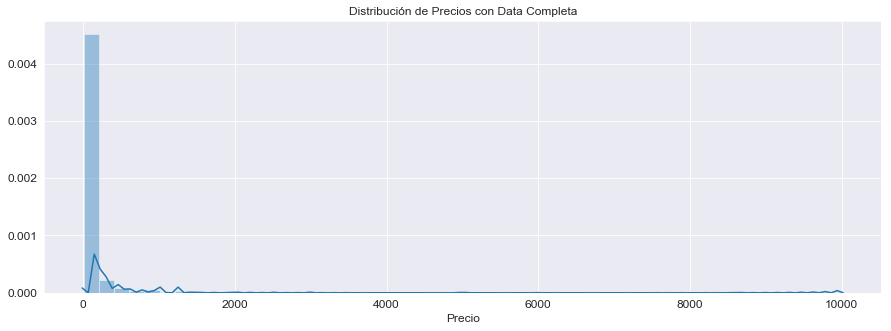

In [58]:
import matplotlib.pylab as pylab
#salida de las variables con pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.figsize': (15, 10),
         'font.weight' : 'normal'}
pylab.rcParams.update(params)

plt.figure(figsize=(15,5))
sns.set_style("darkgrid")
out = sns.distplot(madrid2.Precio).set_title("Distribución de Precios con Data Completa")

# Este histograma nos ayuda a visualizar que debemos limpiar los extremos,
#Por lo tanto, se procede a realizar un filtrado de los cuartiles .1 y .9


Este histograma demuestra claramente que la base de datos tiene muchos valores ceros (0) en la columna **Precio**, y valores dispersos en rangos elevados que alteran el análisis.
En función a eso y para no alterar en gran medida la muestra, se eliminan los precios de los cuartiles 0.10 y 0.90.

In [59]:
#Definición de quantiles
p90 = madrid2["Precio"].quantile(0.90)
p10 = madrid2["Precio"].quantile(0.10)

print("Para mayor precisión en la evaluación de la data, procedemos a eliminar las muestras inferiores al quantil 0.1 ({}) y las superiores al quatil 0.9 ({}). \n".format(p10,p90))


Para mayor precisión en la evaluación de la data, procedemos a eliminar las muestras inferiores al quantil 0.1 (25.0) y las superiores al quatil 0.9 (200.0). 



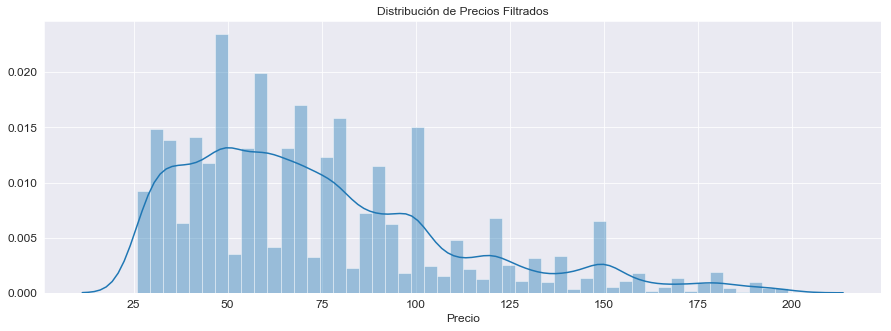

In [60]:
plt.figure(figsize=(15,5))
sns.set_style("darkgrid")
madrid_cuartiles = madrid2[(madrid2.Precio > 25) & (madrid2.Precio < 200)]
out = sns.distplot(madrid_cuartiles.Precio).set_title("Distribución de Precios Filtrados")

En este Histograma de la variable **Precio**, se puede observar mejor su distribución. 

Es interesante que esta variable no se distribuya Normal a pesar de tener una gran cantidad de datos. En los siguientes apartados se realizan otros análisis para ver si el precio se ve explicado por otras variables.

A continuación, se crea na nueva columna nueva que indica si el anuncio de **Airbnb** es relativamente nuevo. Para eso, se utiliza la información de **Fecha_ultima_valoracion** recordando que, se habían reemplazado los valores nulos de esta variable por fechas al día del sistema. Por esto, cuando la variable tome la fecha del sistema, el anuncio se considerará como Nuevo; y Antigüo en caso que exista un valor diferente a la fecha del sistema

In [61]:
def con(Fecha_ultima_valoracion, umbral):
    if Fecha_ultima_valoracion < umbral:
        return "Antiguo"
    else:
        return "Nuevo"

In [62]:
from datetime import date, datetime
fecha = date(2019, 1, 1)
madrid_cuartiles['Antiguedad'] = madrid2.apply(lambda fila: con(fila['Fecha_ultima_valoracion'], fecha), axis=1)

madrid_cuartiles.head()

Id                                             Nombre Host_id  \
0   6369  Rooftop terrace room with ensuite bathroom, Airc.   13660   
2  24805                             Gran Via Studio Madrid  101471   
3  24836                     Select the Madrid more "cool".  101653   
5  30320                        Great Vacational Apartments  130907   
6  30959                    Beautiful loft in Madrid Center  132883   

  Nombre_Dueño Grupo_Barrio          Barrio   Latitud  Longitud  \
0        Simon    Chamartín  Hispanoamérica  40.45628  -3.67763   
2       Iraido       Centro     Universidad  40.42202  -3.70395   
3        Tenty       Centro        Justicia  40.41995  -3.69764   
5         Dana       Centro             Sol  40.41552  -3.70346   
6       Angela       Centro     Embajadores  40.41111  -3.70269   

   Tipo_Habitacion  Precio  Noches_Minimas  Numero_Valoraciones  \
0     Private room      70               1                   65   
2  Entire home/apt      80               5                    2   
3  Entire home/apt     115               3                   64   
5  Entire home/apt      65               5                  168   
6  Entire home/apt      54               3                    8   

  Fecha_ultima_valoracion  Valoraciones_por_mes  Propiedades_Host  \
0              2019-09-04                  0.56                 1   
2              2017-07-03                  0.03                 1   
3              2019-07-07                  0.63                 1   
5              2019-07-09                  1.50                 3   
6              2017-05-30                  0.15                 1   

   Disponibilidad_365 Antiguedad  
0                  53      Nuevo  
2                 354    Antiguo  
3                 301      Nuevo  
5                 322      Nuevo  
6                   0    Antiguo

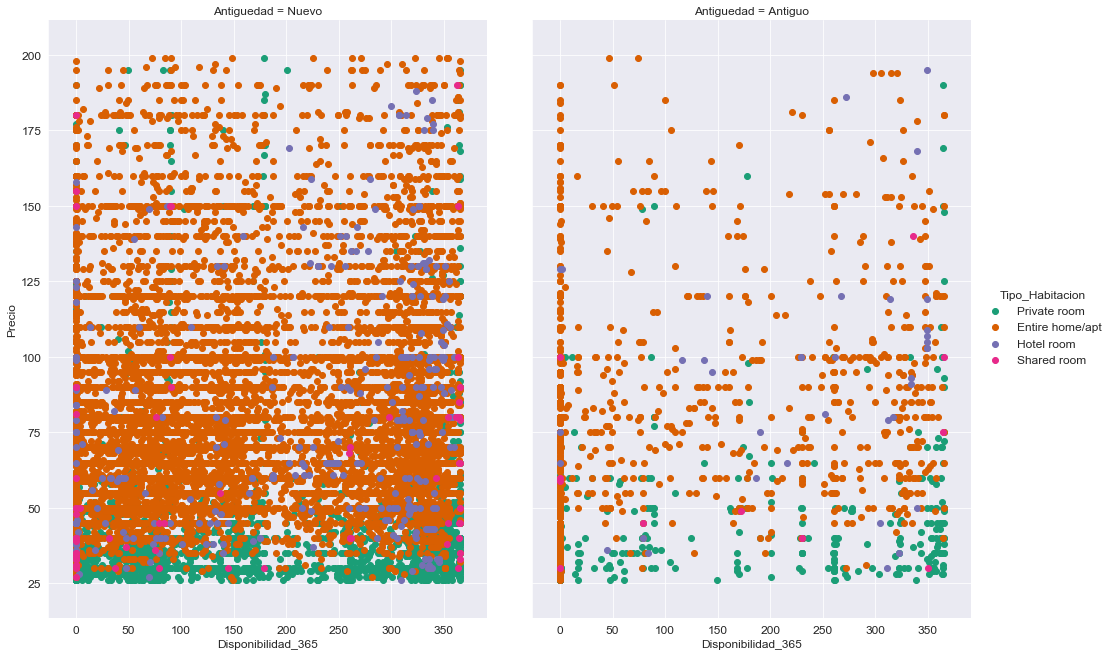

In [63]:
# Diagrama de dispeción de puntos comparativa Antiguedad ~ Tipo de Habitación

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
graph1 = sns.FacetGrid(
    madrid_cuartiles,
    col = "Antiguedad",
    hue = "Tipo_Habitacion",  
    palette = "Dark2", 
    sharey = True
)
p = graph1.map(plt.scatter, "Disponibilidad_365", "Precio")
p.fig.set_size_inches(15,12)
p.add_legend()


**Del grafico de disperción, se aprecia lo siguiente:**

- Los huéspedes que visitan Madrid suelen buscar opciones que les ofrezcan algo más de lo que pueden encontrar en un hotel. Quedarse en casa de otras personas les permite disfrutar de servicios interesantes y vivir experiencias muy positivas que les animan a volver a la ciudad en el
futuro.

- La mayoria de las ofertas en Airbnb son para alquiler de **Apartamentos Enteros**, seguido por **Cuartos Privados** y el comportamiento de **Hotel Room** y **Shared Room** en menores cantidades, dispersos de formas no predecibles.

- Tendencia a fijar el precio por noche en multiplos de 10. Se aprecia que en su mayoria, los anuncios han recibido por lo menos un comentario. 

- Existe mayor cantidad de muestras nuevas, con información actualizada al 2019.


Para continúar el análisis de nuestros datos, vamos a enfocarnos en los Apartamentos que han recibido al menos un comentario, se selecciona una muestra de 2500 sitios, que cuentan con la mayor cantidad de valoraciones:

In [64]:
#Ordeno los alojamientos por número de valoraciones. Luego selecciono los 2000 más valorados.

madridvaloraciones = madrid_cuartiles.sort_values(['Numero_Valoraciones'], ascending=[False])
madridvaloraciones.head()


Id                             Nombre   Host_id     Nombre_Dueño  \
24      93100               *** MALASAÑA B&B ***    499977            Charo   
321    721057  City Centre NO HIGH WEEKEND RATES   1954334             Mike   
850   1981286         Estudio moderno y acogedor  10215430      Tomi Y Nico   
153    420039     Bonito estudio en pleno centro   9934732  Fernando Javier   
1307  3908928                 charming apartment   8321213            Paula   

     Grupo_Barrio       Barrio   Latitud  Longitud  Tipo_Habitacion  Precio  \
24         Centro  Universidad  40.42462  -3.70352     Private room      32   
321        Centro  Embajadores  40.40912  -3.70064  Entire home/apt      55   
850        Centro  Embajadores  40.40639  -3.69866  Entire home/apt      40   
153        Centro  Universidad  40.42602  -3.70502  Entire home/apt      38   
1307       Centro       Cortes  40.41155  -3.69474  Entire home/apt      69   

      Noches_Minimas  Numero_Valoraciones Fecha_ultima_valoracion  \
24                 1                  594              2019-09-14   
321                2                  593              2019-09-13   
850                1                  589              2019-09-10   
153                1                  582              2019-08-28   
1307               1                  563              2019-09-12   

      Valoraciones_por_mes  Propiedades_Host  Disponibilidad_365 Antiguedad  
24                    5.83                 3                 321      Nuevo  
321                   7.03                 1                 232      Nuevo  
850                   8.45                 2                 189      Nuevo  
153                   6.55                 5                 270      Nuevo  
1307                  9.16                13                 103      Nuevo

In [65]:
# Seleccion y muestra de los 2000 alojamientos con más valoraciones.
madrid2000valoraciones = madridvaloraciones.iloc[0:2000,]

#Mapa de Madrid
MapaDeMadrid = folium.Map(location=[40.4167, -3.7032], zoom_start=14, tiles='cartodbpositron')

# Función para colores
# Quiero crear una función para calificar a los alojamientos como baratos, normales o caros.
# Si el precio es inferior a 75 será barato y tendrá color verde
# Si el precio está entre 75 y 150 será normal y tendrá color amarillo
# Si el precio es superior a 150, será caro y el color será rojo

def getColor(Precio):
    if Precio < 75:
        return "#31a354" #Verde
    elif Precio < 150:
        return "#fec44f" #Amarillo
    else:
        return "#e41a1c" #Rojo

# Insertar los datos obtenidos en el mapa
madrid2000 = madrid2000valoraciones.apply(lambda row: folium.CircleMarker([row.Latitud, row.Longitud], 
                                                tooltip=row.Precio, radius=2, 
                                                color=getColor(row.Precio)).add_to(MapaDeMadrid),
    axis=1)

En el siguiente apartado, se mapean los 2000 sitios con mayor número de evaluaciones y se visualiza su precio al poner el cursor encima de cada punto.

In [66]:
# Insertar los marcadores de mercadillos en el mapa

from folium.plugins import HeatMap
mercadillos.apply(
    lambda row: folium.Marker([row.Latitud, row.Longitud], tooltip=row.Nombre_Mercado, radius=3).add_to(MapaDeMadrid),
    axis=1
)

# Insertar los marcadores de museos en el mapa

from folium.plugins import HeatMap
museos.apply(
    lambda row: folium.Marker([row.Latitud, row.Longitud], tooltip=row.Museo, radius=3,icon = folium.Icon(color='green')).add_to(MapaDeMadrid),
    axis=1
)


MapaDeMadrid

Se aprecia en el mapa que:

- Para los 2000 sitios filtrados _(basado en  cantidad de evaluaciones recibidas)_ los sitios con mayor comentarios son aquellos cuyo precio es inferior a **75 euros**, seguido por aquellos inferiores a **150 Euros** y en menor cantidad aquellos superiores a este precio.
- Es común que los rangos inferiores a 75 Euros tengan mayor recurrencia entre usuarios y puedan contar con evaluaciones más detalladas.
- La ubicación de los mercadillos no influye de manera intuitiva en la evaluación de los pisos, de hecho se encuentran en su mayoría lejos del Centro de Madrid.
- Los museos de la ciudad de madrid se concentran en el área céntrica de la ciudad e igualmente, a medida que se alejan, se aprecian propiedades de AirBnb aledañas a los mismos, siguiendo los criterios de filtrado hasta el momento.
- Uno de los principales atractivos de Madrid es el turismo, por ello tiene sentido que cerca de cada museo hayan propiedades activas de AirBnb.

## Hosts Populares en Madrid

A continuación, se muestran los host que toman la máxima ventaja de los servicios de **AirBnB**, se aprecia que el host en el primer lugar tiene casi 250 propiedades registradas, el segundo lugar baja a casi la mitad (~100), el tercero cerca de las 75 y los demás se distribuyen cerca de las 50 propiedades.

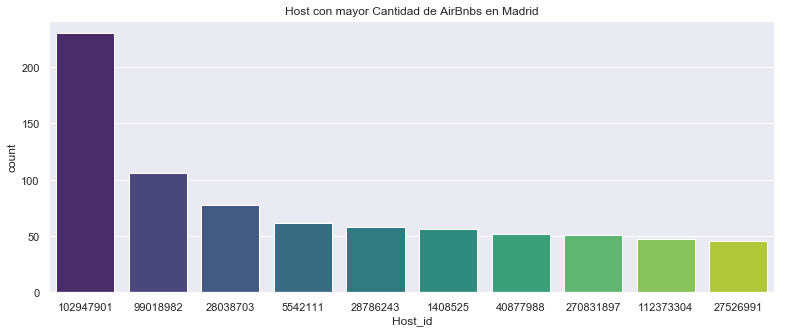

In [81]:
plt.figure(1, figsize=(13, 5))
plt.title("Host con mayor Cantidad de AirBnbs en Madrid")
sns.countplot(x = "Host_id", 
              order=madrid_cuartiles['Host_id'].value_counts().index[0:10],
              data=madrid_cuartiles,
              palette='viridis')


In [82]:
print("Existen {} Id de Host en el Dataset y los 10 con mayor cantidad de AirBnbs registrado son: {}... \n".format(len(madrid_cuartiles.Host_id.unique()),
                                                                                      ", ".join(madrid_cuartiles['Host_id'].value_counts().index[0:10])))


Existen 9153 Id de Host en el Dataset y los 10 con mayor cantidad de AirBnbs registrado son: 102947901, 99018982, 28038703, 5542111, 28786243, 1408525, 40877988, 270831897, 112373304, 27526991... 



## Barrios de Madrid

A continuación, se evalúan los barrios con mayor cantidad de AirBnbs en Madrid, utilizando la data de los cuartiles:

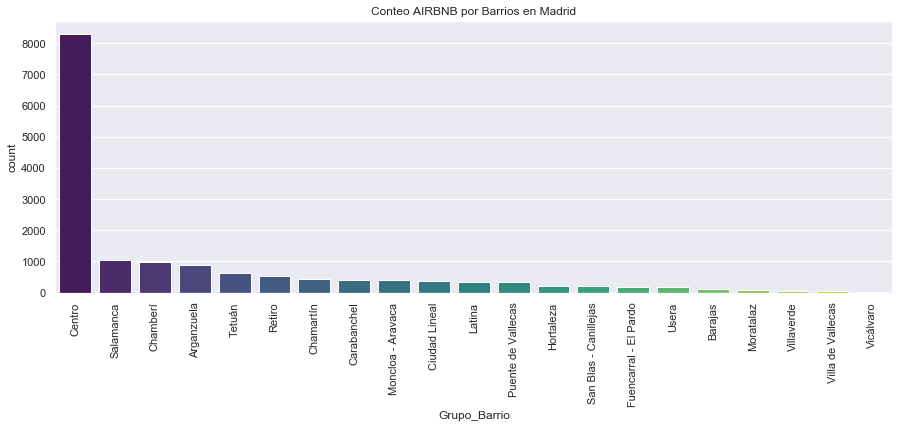

In [83]:
sns.set(style='darkgrid')
barriosMadrid = plt.subplots(figsize=(15,5))
barriosMadrid = sns.countplot(madrid_cuartiles.Grupo_Barrio,
                      data = madrid_cuartiles,
                      order = madrid_cuartiles['Grupo_Barrio'].value_counts().index,
                      palette="viridis").set_title("Conteo AIRBNB por Barrios en Madrid")
out1 = plt.xticks(rotation=90)
plt.show()

In [84]:
print("Existen {} Barrios principales en Madrid; sin embargo, el top de 10 de Barrios con mayor número de AirBnbs es: {}... \n".format(len(madrid_cuartiles.Grupo_Barrio.unique()),
                                                                                      ", ".join(madrid_cuartiles['Grupo_Barrio'].value_counts().index[0:10])))


Existen 21 Barrios principales en Madrid; sin embargo, el top de 10 de Barrios con mayor número de AirBnbs es: Centro, Salamanca, Chamberí, Arganzuela, Tetuán, Retiro, Chamartín, Carabanchel, Moncloa - Aravaca, Ciudad Lineal... 



Se diferencia notoriamente que el **Centro** de la ciudad concentra la mayor cantidad de AirBnbs de Madrid.

### Comparación de los 5 Barrios con más muestras:

In [85]:
top5 = madrid_cuartiles['Grupo_Barrio'].value_counts()
x = top5.head(n=5)
x

Centro        8306
Salamanca     1034
Chamberí       970
Arganzuela     869
Tetuán         621
Name: Grupo_Barrio, dtype: int64

Para esta evaluación, creo un sub-dataset con los 5 Barrios con más muestras para hacer una evaluación de su precios, siendo estos:
- **Centro**
- **Salamanca**
- **Chamberí**
- **Arganzuela**
- **Tetuán**

In [86]:
#Crear con GroupBy la información de Precio por los barrios mas costosos 

vecindarios= madrid2[(madrid2.Grupo_Barrio == 'Centro')|
                     (madrid2.Grupo_Barrio == 'Salamanca')|
                     (madrid2.Grupo_Barrio == 'Chamberí')|
                     (madrid2.Grupo_Barrio == 'Arganzuela')|
                     (madrid2.Grupo_Barrio == 'Tetuán')]

tmp = vecindarios.groupby("Grupo_Barrio").agg({'Precio': ['min','mean','max']})
tmp

Precio                  
                min        mean   max
Grupo_Barrio                         
Arganzuela        8   93.807315  8465
Centro           10  129.875883  9999
Chamberí          9  124.414726  5000
Salamanca        10  152.782545  8930
Tetuán           12  160.779236  8601

Se aprecia de la tabla estadistica, que existen valores extremos en cada apartado como precio máximo, pero se pueden ubicar el mínimo y el promedio para cada barrio con mayor cantidad de muestras.

Para esta siguiente evaluación, creamos un sub-dataFrame con valores que no sea extremos, es decir con precios inferiores a 400 Euros (pero mayores a los quartiles filtrados con anterioridad).


Text(0.5,1,'Diagrama de Violines, Comparación Precios Barrios más Numerosos')

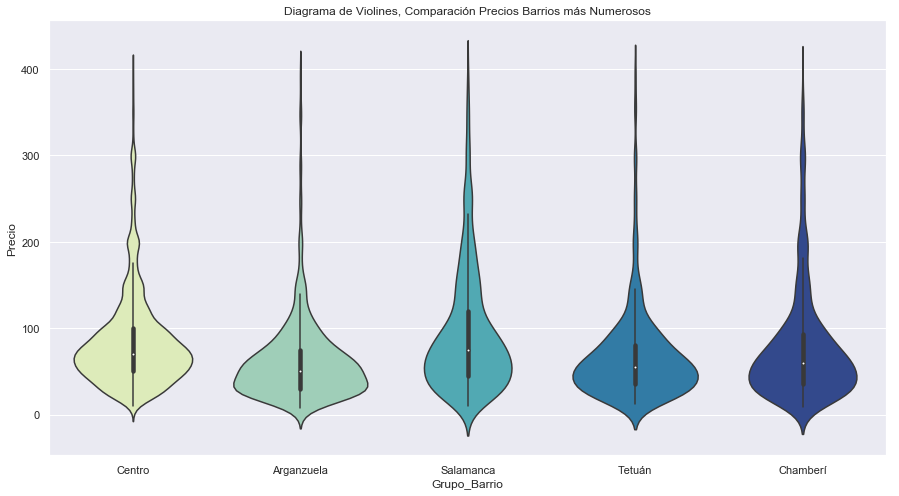

In [87]:
vecindarios=['Centro', 'Salamanca', 'Chamberí', 'Arganzuela', 'Tetuán']
precio400 = madrid2[(madrid2.Precio < 400) & 
                     madrid2.Grupo_Barrio.isin(vecindarios)]                      
precio400
#Usamos Violionplot para ver la distribucion de densidad de precios
plt.figure(figsize=(15,8))
out2 = sns.violinplot(x='Grupo_Barrio', y='Precio',data=precio400, palette='YlGnBu')
out2.set_title('Diagrama de Violines, Comparación Precios Barrios más Numerosos')


Con la tabla estadística y el plot de Violiones, se tienen las siguientes observaciones de la distribución de precios de Aribnb en los Barrios más numerosos de Madrid:

- De los 5 vecindarios con mas muestras, **Salamanca** tiene los rangos de precios mas elevados con un promedio de 78 €/Noche, seguido por el **Centro** con un precio promedio de 75€/Noche.
- Los vecindarios mas costosos en esta muestra son **Salamanca, Centro y Chamberí**.
- El vecindario con precios más baratos, es Arganzuela.
- La forma de los violines de **Arganzuela y Tetúan** con muestras achatadas en su centro y distribución de precios similar en el cuadro de evaluación.
- Por su parte, **Centro y Chamberí** comparten similitudes de forma y de promedios en sus precios.
- Finalmente, **Salamanca** presenta una distribución diferente a todos los demás grupos, con mayor concentración de muestras que los demás barrios en los rangos más elevados. 

In [88]:
madrid_cuartiles.head()

Id                                             Nombre Host_id  \
0   6369  Rooftop terrace room with ensuite bathroom, Airc.   13660   
2  24805                             Gran Via Studio Madrid  101471   
3  24836                     Select the Madrid more "cool".  101653   
5  30320                        Great Vacational Apartments  130907   
6  30959                    Beautiful loft in Madrid Center  132883   

  Nombre_Dueño Grupo_Barrio          Barrio   Latitud  Longitud  \
0        Simon    Chamartín  Hispanoamérica  40.45628  -3.67763   
2       Iraido       Centro     Universidad  40.42202  -3.70395   
3        Tenty       Centro        Justicia  40.41995  -3.69764   
5         Dana       Centro             Sol  40.41552  -3.70346   
6       Angela       Centro     Embajadores  40.41111  -3.70269   

   Tipo_Habitacion  Precio  Noches_Minimas  Numero_Valoraciones  \
0     Private room      70               1                   65   
2  Entire home/apt      80               5                    2   
3  Entire home/apt     115               3                   64   
5  Entire home/apt      65               5                  168   
6  Entire home/apt      54               3                    8   

  Fecha_ultima_valoracion  Valoraciones_por_mes  Propiedades_Host  \
0              2019-09-04                  0.56                 1   
2              2017-07-03                  0.03                 1   
3              2019-07-07                  0.63                 1   
5              2019-07-09                  1.50                 3   
6              2017-05-30                  0.15                 1   

   Disponibilidad_365 Antiguedad  
0                  53      Nuevo  
2                 354    Antiguo  
3                 301      Nuevo  
5                 322      Nuevo  
6                   0    Antiguo

## Wordclouds

En el apartado a continuación, se generan Wordclouds para visualizar las palabras con frecuencia mayor contenidas en las columnas "Nombre" y "Barrio". 

Para instalar este paquete con Conda, hay que ejecutar en el alguno de los siguientes scripts:

```
 conda install -c conda-forge wordcloud
 conda install -c conda-forge/label/gcc7 wordcloud
 conda install -c conda-forge/label/cf201901 wordcloud
```

In [89]:
#Definimos las listas de palabras a utilizar en los wordclouds, que en este caso serán las palabras mas repetidas en
#Host name, nombre de vivienda airbnb y Barrio
Nombrex = madrid_cuartiles['Nombre'].dropna()
Barriox = madrid_cuartiles['Barrio']

In [90]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def make_wordcloud(words):

    text = ""
    for word in words:
        text = text + " " + word

    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords,colormap="YlGnBu",width=1920, height=1080,max_font_size=200, max_words=200, background_color="white").generate(text)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation="gaussian")
    plt.axis("off")
    plt.show()

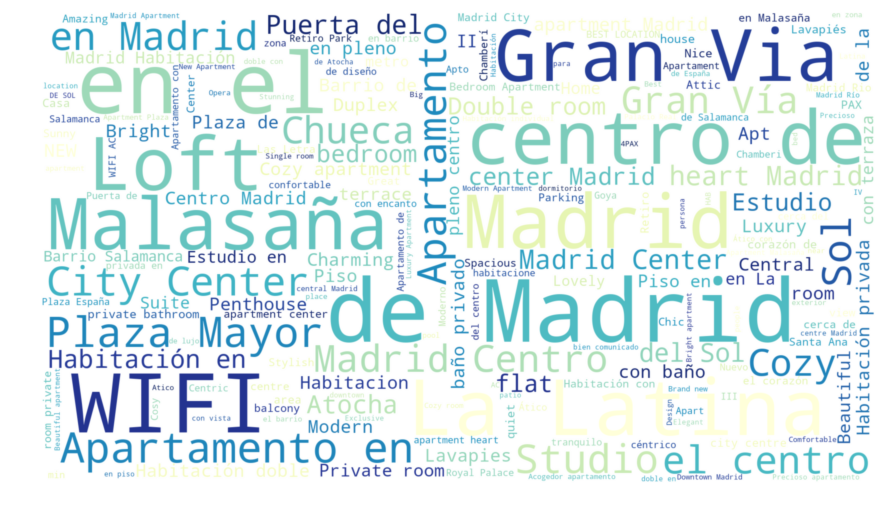

In [91]:
make_wordcloud(Nombrex)

En la columna  **"Nombre"**, correspondiente a los titulos de las propiedades, resaltan las palabras: Madrid, Malasaña, Wifi, Gran Via, Centro, En el...

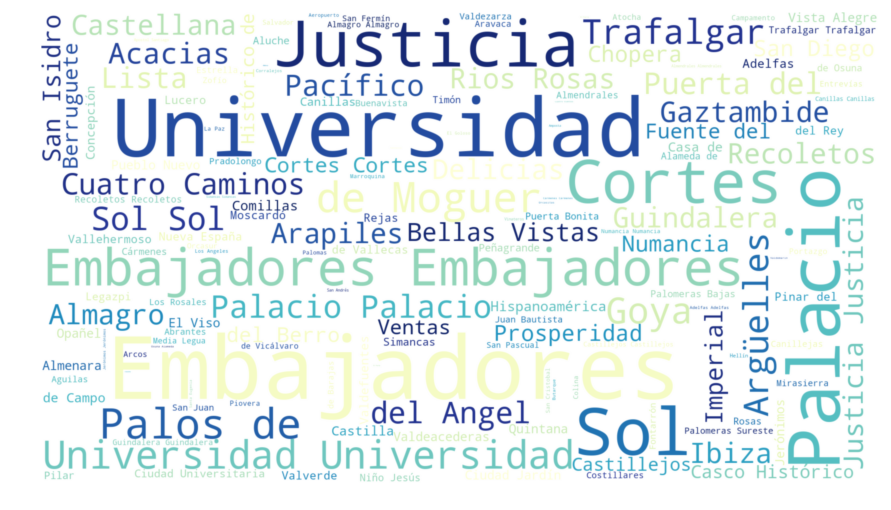

In [92]:
make_wordcloud(Barriox)

En la columna  **"Barrio"**, correspondiente a los vecindarios de las propiedades, resaltan las palabras: Embajadores (varias veces), Palacio, Justicia, Cortes, Universidad...

# GRACIAS.